**In this notebook we'll perform further feature selection and add interaction terms to derive our final model**

In [1]:
from module2_scripts.model import FittedModel, ModelValidation
import pandas as pd
import pickle

In [2]:
X = pd.read_csv('working_datasets/X_processed.csv')
y = pd.read_csv('working_datasets/y_processed.csv')

Here we've import the FittedModel and ModelValidation classes from the model module to run and validate the final model.

The FittedModule class has a method .generate_final_X(), which uses stepwise selection to choose features, and adds interaction variables. The number of interaction variables to add to the predictor variable dataframe wil be specified as an argument when initializing the object. After the predictor variables are all finalized, we'll run OLS regression and take a look at the report. We'll then also initialize a ModelValidation object to use train-test-split and K-fold cross validation to validate our model. We're going to run this process 4 times, adding a different number of interaction terms (5, 10, 20 and 50) to each iteration.

---------- Generating Model with 5 Interaction Terms ----------

=== Beginning process of generating final X dataframe using stepwise feature selection and interactions ===
=== Beginning process of using stepwise selecton for feature selection ===
Add  bathrooms_log                  with p-value 0.0
Add  zipcode_dummy__F               with p-value 0.0
Add  grade_log                      with p-value 0.0
Add  yr_built_log                   with p-value 0.0
Add  sqft_living_log                with p-value 6.70741e-253
Add  zipcode_dummy__D               with p-value 4.06904e-290
Add  zipcode_dummy__H               with p-value 5.05561e-233
Add  view_dummy__4                  with p-value 1.88763e-198
Add  zipcode_dummy__E               with p-value 2.23267e-220
Add  view_dummy__3                  with p-value 2.12428e-88
Add  zipcode_dummy__C               with p-value 1.54148e-87
Add  waterfront_dummy__1            with p-value 9.78468e-51
Add  view_dummy__2                  with p-valu

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     2127.
Date:                Sat, 12 Dec 2020   Prob (F-statistic):               0.00
Time:                        23:37:13   Log-Likelihood:            -2.7042e+05
No. Observations:               20332   AIC:                         5.409e+05
Df Residuals:                   20305   BIC:                         5.411e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          5.257e+05   2661.808    197.502      0.000     5.2e+05    5.31e+05
bathrooms_log                  2.558e+04   1905.416     13.424      0.000    2.18e+04    2.93e+04
zipcode_dummy__F              -2.407e+05   4401.915    -54.671      0.000   -2.49e+05   -2.32e+05
grade_log                      9.993e+04   1697.296     58.876      0.000    9.66e+04    1.03e+05
yr_built_log                  -5.617e+04   1577.871    -35.600      0.000   -5.93e+04   -5.31e+04
sqft_living_log                8.777e+04   2146.171     40.897      0.000    8.36e+04     9.2e+04
zipcode_dummy__D              -2.055e+05   4331.530    -47.437      0.000   -2.14e+05   -1.97e+05
zipcode_dummy__H              -1.934e+05   4910.992    -39.384      0.000   -2.03e+05   -1.84e+05
view_dummy__4                  2.469e+05   1.15e+04     21.397      0.000    2.24e+05     2.7e+05
zipcode_dummy__E              -1.768e+05   4578.960    -38.615      0.000   -1.86e+05   -1.68e+05
view_dummy__3                    1.3e+05   7365.757     17.646      0.000    1.16e+05    1.44e+05
zipcode_dummy__C               3.812e+04   3862.491      9.869      0.000    3.06e+04    4.57e+04
waterfront_dummy__1            2.966e+05    1.8e+04     16.475      0.000    2.61e+05    3.32e+05
view_dummy__2                   6.56e+04   5212.524     12.586      0.000    5.54e+04    7.58e+04
zipcode_dummy__I              -1.067e+05   6965.194    -15.313      0.000    -1.2e+05    -9.3e+04
bedrooms_log                  -8476.5389   1435.600     -5.905      0.000   -1.13e+04   -5662.646
view_dummy__1                  8.713e+04   8417.786     10.351      0.000    7.06e+04    1.04e+05
floors_log                     1.267e+04   1474.021      8.597      0.000    9783.513    1.56e+04
condition_log                  1.437e+04   1122.779     12.799      0.000    1.22e+04    1.66e+04
zipcode_dummy__G              -6.468e+04   4459.157    -14.506      0.000   -7.34e+04   -5.59e+04
sqft_basement_dummy__1         7664.5653   2676.062      2.864      0.004    2419.267    1.29e+04
zipcode_dummy__B              -1.971e+04   3743.028     -5.266      0.000    -2.7e+04   -1.24e+04
grade_log*sqft_living_log      3.799e+04   1847.330     20.567      0.000    3.44e+04    4.16e+04
bathrooms_log*grade_log        8186.3611   1959.800      4.177      0.000    4344.995     1.2e+04
bathrooms_log*sqft_living_log  7717.1867   1589.277      4.856      0.000    4602.075    1.08e+04
grade_log*bedrooms_log        -6208.6809   1271.765     -4.882      0.000   -8701.443   -3715.918
sqft_living_log*floors_log     3322.7084   1477.271      2.249      0.025     427.138    6218.278
==============================================================================
Omnibus:                     6532.802   Durbin-Watson:          

--- Displaying Train and Test Split Sizes ---


,split_sizes
X_train,16265
X_test,4067
y_train,16265
y_test,4067


---------- Validation Report ----------

Train-Test Split MSE	K-Fold Cross Val MSE


,sqrt_mse
set,
Train,144171.296
Test,146062.909
,sqrt_mse
folds,
5,145027.821
10,145018.680
20,144869.922
50,144836.539


== Displaying Predicted vs Actual Y values ==


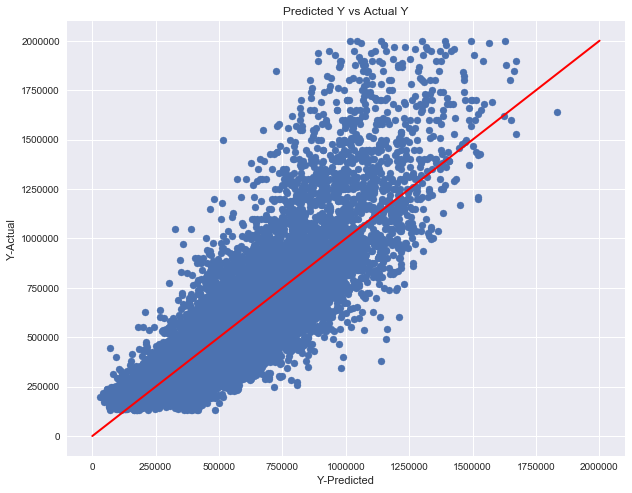

C:\Users\jabdullah\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


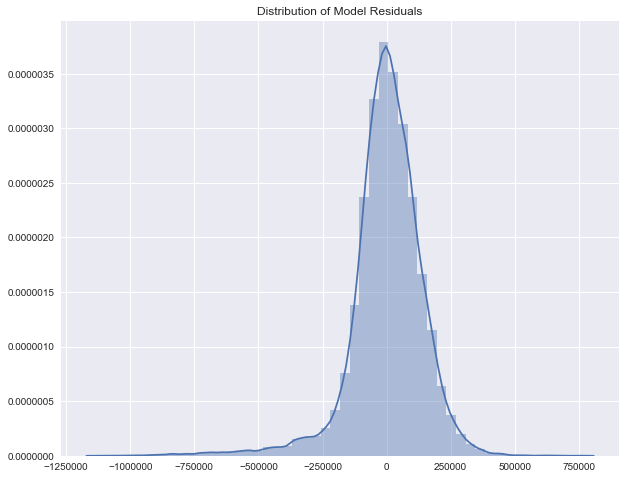


---------- Generating Model with 10 Interaction Terms ----------

=== Beginning process of generating final X dataframe using stepwise feature selection and interactions ===
=== Beginning process of using stepwise selecton for feature selection ===
Add  bathrooms_log                  with p-value 0.0
Add  zipcode_dummy__F               with p-value 0.0
Add  grade_log                      with p-value 0.0
Add  yr_built_log                   with p-value 0.0
Add  sqft_living_log                with p-value 6.70741e-253
Add  zipcode_dummy__D               with p-value 4.06904e-290
Add  zipcode_dummy__H               with p-value 5.05561e-233
Add  view_dummy__4                  with p-value 1.88763e-198
Add  zipcode_dummy__E               with p-value 2.23267e-220
Add  view_dummy__3                  with p-value 2.12428e-88
Add  zipcode_dummy__C               with p-value 1.54148e-87
Add  waterfront_dummy__1            with p-value 9.78468e-51
Add  view_dummy__2                  with p-va

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     1842.
Date:                Sat, 12 Dec 2020   Prob (F-statistic):               0.00
Time:                        23:37:53   Log-Likelihood:            -2.7018e+05
No. Observations:               20332   AIC:                         5.404e+05
Df Residuals:                   20300   BIC:                         5.407e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             5.315e+05   2690.650    197.536      0.000    5.26e+05    5.37e+05
bathrooms_log                     2.456e+04   1898.389     12.938      0.000    2.08e+04    2.83e+04
zipcode_dummy__F                 -2.442e+05   4375.028    -55.808      0.000   -2.53e+05   -2.36e+05
grade_log                         8.352e+04   2028.635     41.170      0.000    7.95e+04    8.75e+04
yr_built_log                     -5.505e+04   1568.603    -35.095      0.000   -5.81e+04    -5.2e+04
sqft_living_log                   8.697e+04   2228.868     39.018      0.000    8.26e+04    9.13e+04
zipcode_dummy__D                  -2.09e+05   4294.376    -48.674      0.000   -2.17e+05   -2.01e+05
zipcode_dummy__H                 -1.981e+05   4895.376    -40.468      0.000   -2.08e+05   -1.89e+05
view_dummy__4                     2.396e+05   1.15e+04     20.926      0.000    2.17e+05    2.62e+05
zipcode_dummy__E                 -1.813e+05   4534.886    -39.974      0.000    -1.9e+05   -1.72e+05
view_dummy__3                     1.236e+05   7321.311     16.882      0.000    1.09e+05    1.38e+05
zipcode_dummy__C                  1.421e+04   4032.365      3.523      0.000    6302.536    2.21e+04
waterfront_dummy__1               3.049e+05   1.78e+04     17.126      0.000     2.7e+05     3.4e+05
view_dummy__2                     6.294e+04   5165.485     12.185      0.000    5.28e+04    7.31e+04
zipcode_dummy__I                 -1.076e+05   6908.917    -15.572      0.000   -1.21e+05    -9.4e+04
bedrooms_log                     -8799.4433   1423.660     -6.181      0.000   -1.16e+04   -6008.954
view_dummy__1                     8.206e+04   8330.536      9.850      0.000    6.57e+04    9.84e+04
floors_log                        1.248e+04   1468.369      8.500      0.000    9603.716    1.54e+04
condition_log                     1.492e+04   1113.340     13.399      0.000    1.27e+04    1.71e+04
zipcode_dummy__G                 -5.512e+04   4449.288    -12.389      0.000   -6.38e+04   -4.64e+04
sqft_basement_dummy__1            5194.6020   2667.414      1.947      0.051     -33.746    1.04e+04
zipcode_dummy__B                 -1.592e+04   3720.966     -4.278      0.000   -2.32e+04   -8623.996
grade_log*sqft_living_log          3.17e+04   1865.636     16.991      0.000     2.8e+04    3.54e+04
bathrooms_log*grade_log           3975.3676   2164.436      1.837      0.066    -267.101    8217.836
bathrooms_log*sqft_living_log     9715.4996   1990.581      4.881      0.000    5813.799    1.36e+04
grade_log*bedrooms_log           -1064.6318   1627.849     -0.654      0.513   -4255.347    2126.083
sqft_living_log*floors_log        6080.6258   1758.413      3.458      0.001    2633.994    9527.258
grade_log*floors_log              3971.2875   1842.59

--- Displaying Train and Test Split Sizes ---


,split_sizes
X_train,16265
X_test,4067
y_train,16265
y_test,4067


---------- Validation Report ----------

Train-Test Split MSE	K-Fold Cross Val MSE


,sqrt_mse
set,
Train,142385.321
Test,144714.112
,sqrt_mse
folds,
5,143515.340
10,143476.263
20,143262.163
50,143208.529


== Displaying Predicted vs Actual Y values ==


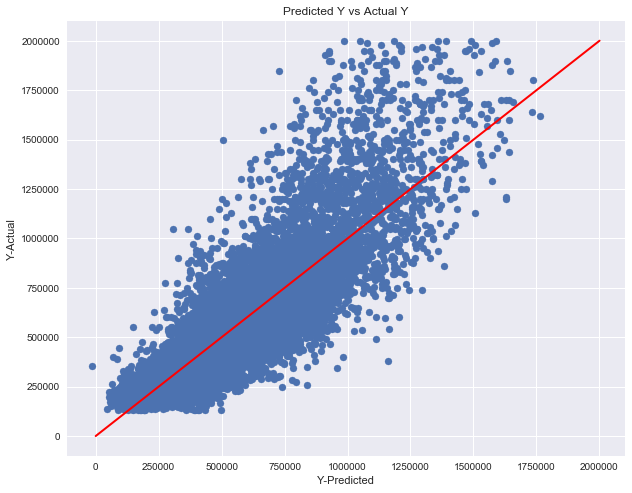

C:\Users\jabdullah\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


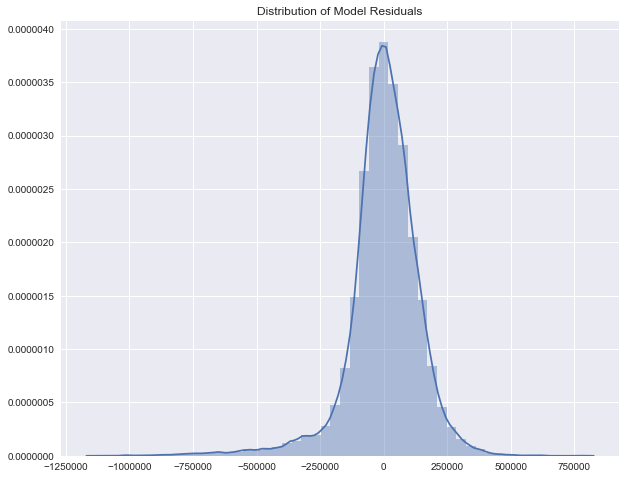


---------- Generating Model with 20 Interaction Terms ----------

=== Beginning process of generating final X dataframe using stepwise feature selection and interactions ===
=== Beginning process of using stepwise selecton for feature selection ===
Add  bathrooms_log                  with p-value 0.0
Add  zipcode_dummy__F               with p-value 0.0
Add  grade_log                      with p-value 0.0
Add  yr_built_log                   with p-value 0.0
Add  sqft_living_log                with p-value 6.70741e-253
Add  zipcode_dummy__D               with p-value 4.06904e-290
Add  zipcode_dummy__H               with p-value 5.05561e-233
Add  view_dummy__4                  with p-value 1.88763e-198
Add  zipcode_dummy__E               with p-value 2.23267e-220
Add  view_dummy__3                  with p-value 2.12428e-88
Add  zipcode_dummy__C               with p-value 1.54148e-87
Add  waterfront_dummy__1            with p-value 9.78468e-51
Add  view_dummy__2                  with p-va

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     1473.
Date:                Sat, 12 Dec 2020   Prob (F-statistic):               0.00
Time:                        23:38:32   Log-Likelihood:            -2.6975e+05
No. Observations:               20332   AIC:                         5.396e+05
Df Residuals:                   20290   BIC:                         5.399e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                   5.402e+05   2728.663    197.985      0.000    5.35e+05    5.46e+05
bathrooms_log                            2.38e+04   1870.735     12.721      0.000    2.01e+04    2.75e+04
zipcode_dummy__F                       -2.542e+05   4348.104    -58.460      0.000   -2.63e+05   -2.46e+05
grade_log                               1.022e+05   2428.278     42.073      0.000    9.74e+04    1.07e+05
yr_built_log                           -5.427e+04   1587.432    -34.187      0.000   -5.74e+04   -5.12e+04
sqft_living_log                         9.502e+04   2852.969     33.307      0.000    8.94e+04    1.01e+05
zipcode_dummy__D                       -2.243e+05   4431.963    -50.614      0.000   -2.33e+05   -2.16e+05
zipcode_dummy__H                        -2.12e+05   4879.378    -43.440      0.000   -2.22e+05   -2.02e+05
view_dummy__4                           2.327e+05   1.12e+04     20.722      0.000    2.11e+05    2.55e+05
zipcode_dummy__E                       -1.743e+05   4453.866    -39.131      0.000   -1.83e+05   -1.66e+05
view_dummy__3                           1.196e+05   7179.541     16.652      0.000    1.05e+05    1.34e+05
zipcode_dummy__C                        1.218e+04   3965.196      3.073      0.002    4411.662       2e+04
waterfront_dummy__1                     3.069e+05   1.74e+04     17.591      0.000    2.73e+05    3.41e+05
view_dummy__2                           6.172e+04   5064.874     12.186      0.000    5.18e+04    7.16e+04
zipcode_dummy__I                       -1.132e+05   6790.292    -16.672      0.000   -1.27e+05   -9.99e+04
bedrooms_log                           -9112.3922   1411.048     -6.458      0.000   -1.19e+04   -6346.625
view_dummy__1                           7.999e+04   8164.465      9.797      0.000     6.4e+04     9.6e+04
floors_log                              5622.0839   1841.658      3.053      0.002    2012.284    9231.883
condition_log                           1.249e+04   1096.491     11.392      0.000    1.03e+04    1.46e+04
zipcode_dummy__G                       -7.193e+04   4421.124    -16.270      0.000   -8.06e+04   -6.33e+04
sqft_basement_dummy__1                  4626.4975   2628.312      1.760      0.078    -525.207    9778.202
zipcode_dummy__B                       -2.621e+04   3695.122     -7.093      0.000   -3.35e+04    -1.9e+04
grade_log*sqft_living_log               3.053e+04   2035.986     14.995      0.000    2.65e+04    3.45e+04
bathrooms_log*grade_log                 2012.2022   2242.472      0.897      0.370   -2383.224    6407.628
bathrooms_log*sqft_living_log           1.458e+04   2264.490      6.437      0.000    1.01e+04     1.9e+04
grade_log*bedrooms_log                   845.4366   1716.664      0.492      0.622   -2

--- Displaying Train and Test Split Sizes ---


,split_sizes
X_train,16265
X_test,4067
y_train,16265
y_test,4067


---------- Validation Report ----------

Train-Test Split MSE	K-Fold Cross Val MSE


,sqrt_mse
set,
Train,139331.991
Test,142199.804
,sqrt_mse
folds,
5,140605.336
10,140571.349
20,140380.912
50,140316.806


== Displaying Predicted vs Actual Y values ==


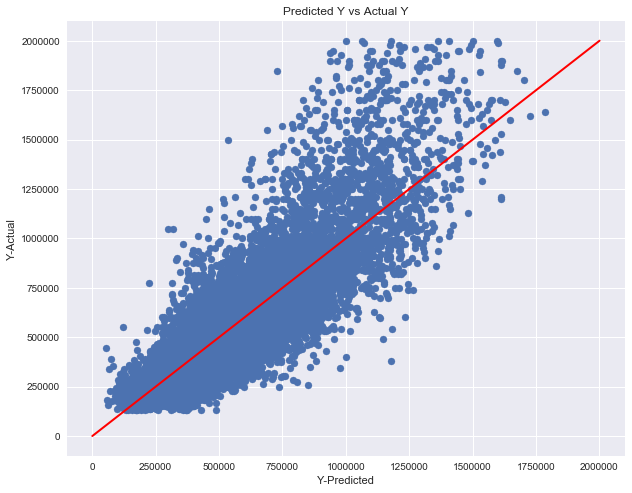

C:\Users\jabdullah\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


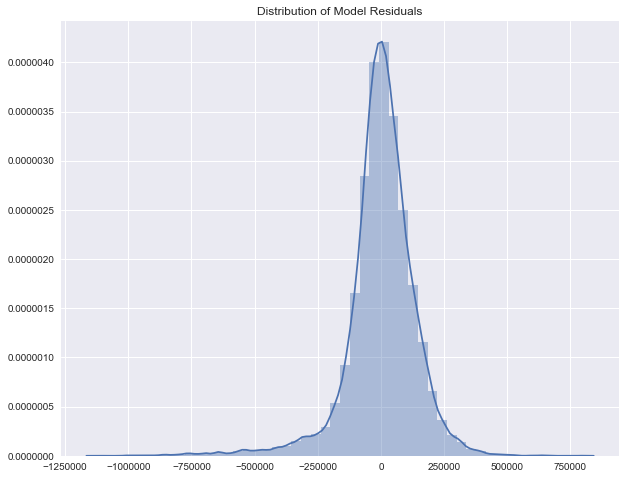


---------- Generating Model with 50 Interaction Terms ----------

=== Beginning process of generating final X dataframe using stepwise feature selection and interactions ===
=== Beginning process of using stepwise selecton for feature selection ===
Add  bathrooms_log                  with p-value 0.0
Add  zipcode_dummy__F               with p-value 0.0
Add  grade_log                      with p-value 0.0
Add  yr_built_log                   with p-value 0.0
Add  sqft_living_log                with p-value 6.70741e-253
Add  zipcode_dummy__D               with p-value 4.06904e-290
Add  zipcode_dummy__H               with p-value 5.05561e-233
Add  view_dummy__4                  with p-value 1.88763e-198
Add  zipcode_dummy__E               with p-value 2.23267e-220
Add  view_dummy__3                  with p-value 2.12428e-88
Add  zipcode_dummy__C               with p-value 1.54148e-87
Add  waterfront_dummy__1            with p-value 9.78468e-51
Add  view_dummy__2                  with p-va

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     942.2
Date:                Sat, 12 Dec 2020   Prob (F-statistic):               0.00
Time:                        23:39:12   Log-Likelihood:            -2.6895e+05
No. Observations:               20332   AIC:                         5.380e+05
Df Residuals:                   20260   BIC:                         5.386e+05
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                   5.472e+05   2761.389    198.160      0.000    5.42e+05    5.53e+05
bathrooms_log                           3.992e+04   2927.092     13.637      0.000    3.42e+04    4.57e+04
zipcode_dummy__F                       -2.631e+05   4357.786    -60.370      0.000   -2.72e+05   -2.55e+05
grade_log                               9.821e+04   2577.326     38.104      0.000    9.32e+04    1.03e+05
yr_built_log                           -4.932e+04   1610.162    -30.629      0.000   -5.25e+04   -4.62e+04
sqft_living_log                         9.644e+04   3179.641     30.331      0.000    9.02e+04    1.03e+05
zipcode_dummy__D                        -2.43e+05   4525.750    -53.701      0.000   -2.52e+05   -2.34e+05
zipcode_dummy__H                       -2.277e+05   4963.197    -45.879      0.000   -2.37e+05   -2.18e+05
view_dummy__4                           2.231e+05   1.81e+04     12.332      0.000    1.88e+05    2.59e+05
zipcode_dummy__E                       -1.987e+05   5143.380    -38.633      0.000   -2.09e+05   -1.89e+05
view_dummy__3                           1.079e+05   9047.569     11.927      0.000    9.02e+04    1.26e+05
zipcode_dummy__C                        8329.8101   3929.164      2.120      0.034     628.330     1.6e+04
waterfront_dummy__1                     4.178e+05   2.43e+04     17.196      0.000     3.7e+05    4.65e+05
view_dummy__2                           5.987e+04   5330.282     11.232      0.000    4.94e+04    7.03e+04
zipcode_dummy__I                       -1.268e+05   6606.773    -19.195      0.000    -1.4e+05   -1.14e+05
bedrooms_log                           -1.277e+04   1500.486     -8.513      0.000   -1.57e+04   -9831.833
view_dummy__1                           7.626e+04   7869.755      9.691      0.000    6.08e+04    9.17e+04
floors_log                              5795.2931   1895.160      3.058      0.002    2080.627    9509.960
condition_log                           1.094e+04   1066.567     10.254      0.000    8845.506     1.3e+04
zipcode_dummy__G                       -8.349e+04   4343.360    -19.222      0.000    -9.2e+04    -7.5e+04
sqft_basement_dummy__1                   617.8414   2571.906      0.240      0.810   -4423.304    5658.986
zipcode_dummy__B                       -3.483e+04   3618.374     -9.626      0.000   -4.19e+04   -2.77e+04
grade_log*sqft_living_log               2.848e+04   2118.535     13.442      0.000    2.43e+04    3.26e+04
bathrooms_log*grade_log                 8465.4929   2445.053      3.462      0.001    3672.990    1.33e+04
bathrooms_log*sqft_living_log           2.211e+04   2396.962      9.223      0.000    1.74e+04    2.68e+04
grade_log*bedrooms_log                   259.9003   1710.431      0.152      0.879   -3

--- Displaying Train and Test Split Sizes ---


,split_sizes
X_train,16265
X_test,4067
y_train,16265
y_test,4067


---------- Validation Report ----------

Train-Test Split MSE	K-Fold Cross Val MSE


,sqrt_mse
set,
Train,133767.676
Test,137529.375
,sqrt_mse
folds,
5,135777.555
10,135783.845
20,135362.442
50,135292.387


== Displaying Predicted vs Actual Y values ==


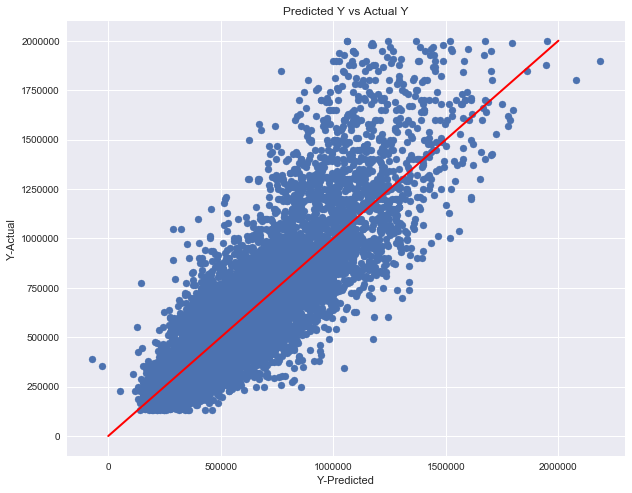

C:\Users\jabdullah\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


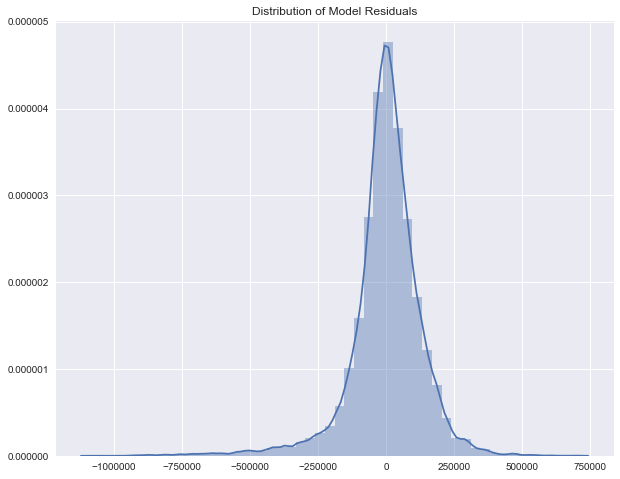

In [3]:
for i in [5, 10, 20, 50]:
    
    print(f'---------- Generating Model with {i} Interaction Terms ----------')
    print('='*80, '\n')
    fitted_model = FittedModel(X, y, n_interactions=i)
    fitted_model.generate_final_X()
    model = fitted_model.ols_summary()
    fitted_model_validation = ModelValidation(fitted_model.X, fitted_model.y)
    fitted_model_validation.validation_report()
    print('='*80, '\n')
    
    #save the model with interaction terms == 10 for later use 
    #we'll use this one for deriving prices of houses using user inputs
    if i == 10:
        pickle.dump(model, open("pkl/model.p","wb"))

In our model runs, as expected we see that the adjusted R-squared increased as we add more interaction terms to our predictor variables, with it being as high as 76.7% when adding 50 interaction terms. 

For simplicity, we'll focus on the model run with +10 interaction terms. We see that adjusted R-squared is 73.7%, which means that 73.7% of the variance in our target variable is explained by our predictor variables, indicating a decent model fit.
The model has a positive skew of +1.373, suggesting from strong outliers in the right tail, 
and that the peak of the distribution is to the left of the mean. Our model distribution's
kurtosis is +9.407, signifying a highly leptokurtic distribution, meaning heavier tails and 
more outliers. The skewness and kurtosis values explain the high Jarque-Bera value, 
telling us that the distribution is not normal. While this is not exactly ideal, we've already
done a lot of data cleaning to reduce outliers, and even removed 5-6% of rows of our overall
dataset in the process. To avoid further loss of data, it was better to just leave any
remaining outliers. Also, "outliers" may be a misleading term for these variables contributing
to the high skewness and kurtosis. Naturally, with any housing market/segment, there will be
a portion of housing that has a property value that is a lot higher than the rest of the 
population. This isn't an issue with the dataset, but moreso an inherent characteristic 
of the environment, which can be due to other factors outside the scope of this model, such as
income distribution, disparity, etc. The low cond. number shows us that we've removed any
issues of multicollinearity from our model. 

While these numbers could all be improved if we just log transform the dependent variable, the model would become a bit difficult to interpret, so for the sake of keeping interpretation simple, the dependent variable's units were left as is.

For model validation, we applied train-test split and K-fold cross validation tests to see what the square root of the mean squared errors would be when applying the model to the test data. Looking at the more reliable cross validation method, we see that our sqrt(mse) are around ~143k when running with 5, 10, 20 and 50 folds. Given the units of the dependent variable, this is a pretty good result. 

Also, note that from our EDA we expected that our model would reflect positive coefficients for the dummy variables 'zipcode__dummy_C' and 'waterfront__dummy_1', and we see exactly that. 

We lastly can take a look at the predicted vs actual y plots for each iteration. It's clear that predicted vs. actual Y have a linear relationship, with the deviations around the linear y_pred=y_actual line increasing as we go further out on both axes. Also, we can take a look at the distribution of model residuals as well. The shapes of the distributions resemble that of a normal distribution but with some negative skewness and high kurtosis, signifying that there are a few cases where the model does not predict the Y value very well. Again, given how much of our dataset we've already cleaned out plus our aim to avoid overtraining the model, we'll accept these outlier residuals.